In [18]:
import numpy as np
import pandas as pd
from datetime import datetime, date 


#可视化
import matplotlib.pyplot as plt
import seaborn as sns

#取消警告
import warnings 
warnings.filterwarnings('ignore') 

In [19]:
df = pd.read_csv('dataset\Aquifer\Aquifer_Petrignano.csv')
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [20]:
#在第一个Rainfall数据出现以前，仅有Depth_to_Groundwater_P24和Depth_to_Groundwater_P25以及少量的Temperature_Petrignano的数据
df1 = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
df1.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,01/01/2009,0.0,-31.96,-31.14,5.2,4.9,-24530.688,2.4
1,02/01/2009,0.0,-32.03,-31.11,2.3,2.5,-28785.888,2.5
2,03/01/2009,0.0,-31.97,-31.07,4.4,3.9,-25766.208,2.4
3,04/01/2009,0.0,-31.91,-31.05,0.8,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3


In [21]:
#将 "Date" 列设置为索引，并将其转换为 DateTime 类型
df1['Date'] = pd.to_datetime(df1['Date'], format = '%d/%m/%Y')
df1.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2009-01-01,0.0,-31.96,-31.14,5.2,4.9,-24530.688,2.4
1,2009-01-02,0.0,-32.03,-31.11,2.3,2.5,-28785.888,2.5
2,2009-01-03,0.0,-31.97,-31.07,4.4,3.9,-25766.208,2.4
3,2009-01-04,0.0,-31.91,-31.05,0.8,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3


In [22]:
#去掉没有用的
df1=df1.drop(['Temperature_Petrignano'], axis=1)

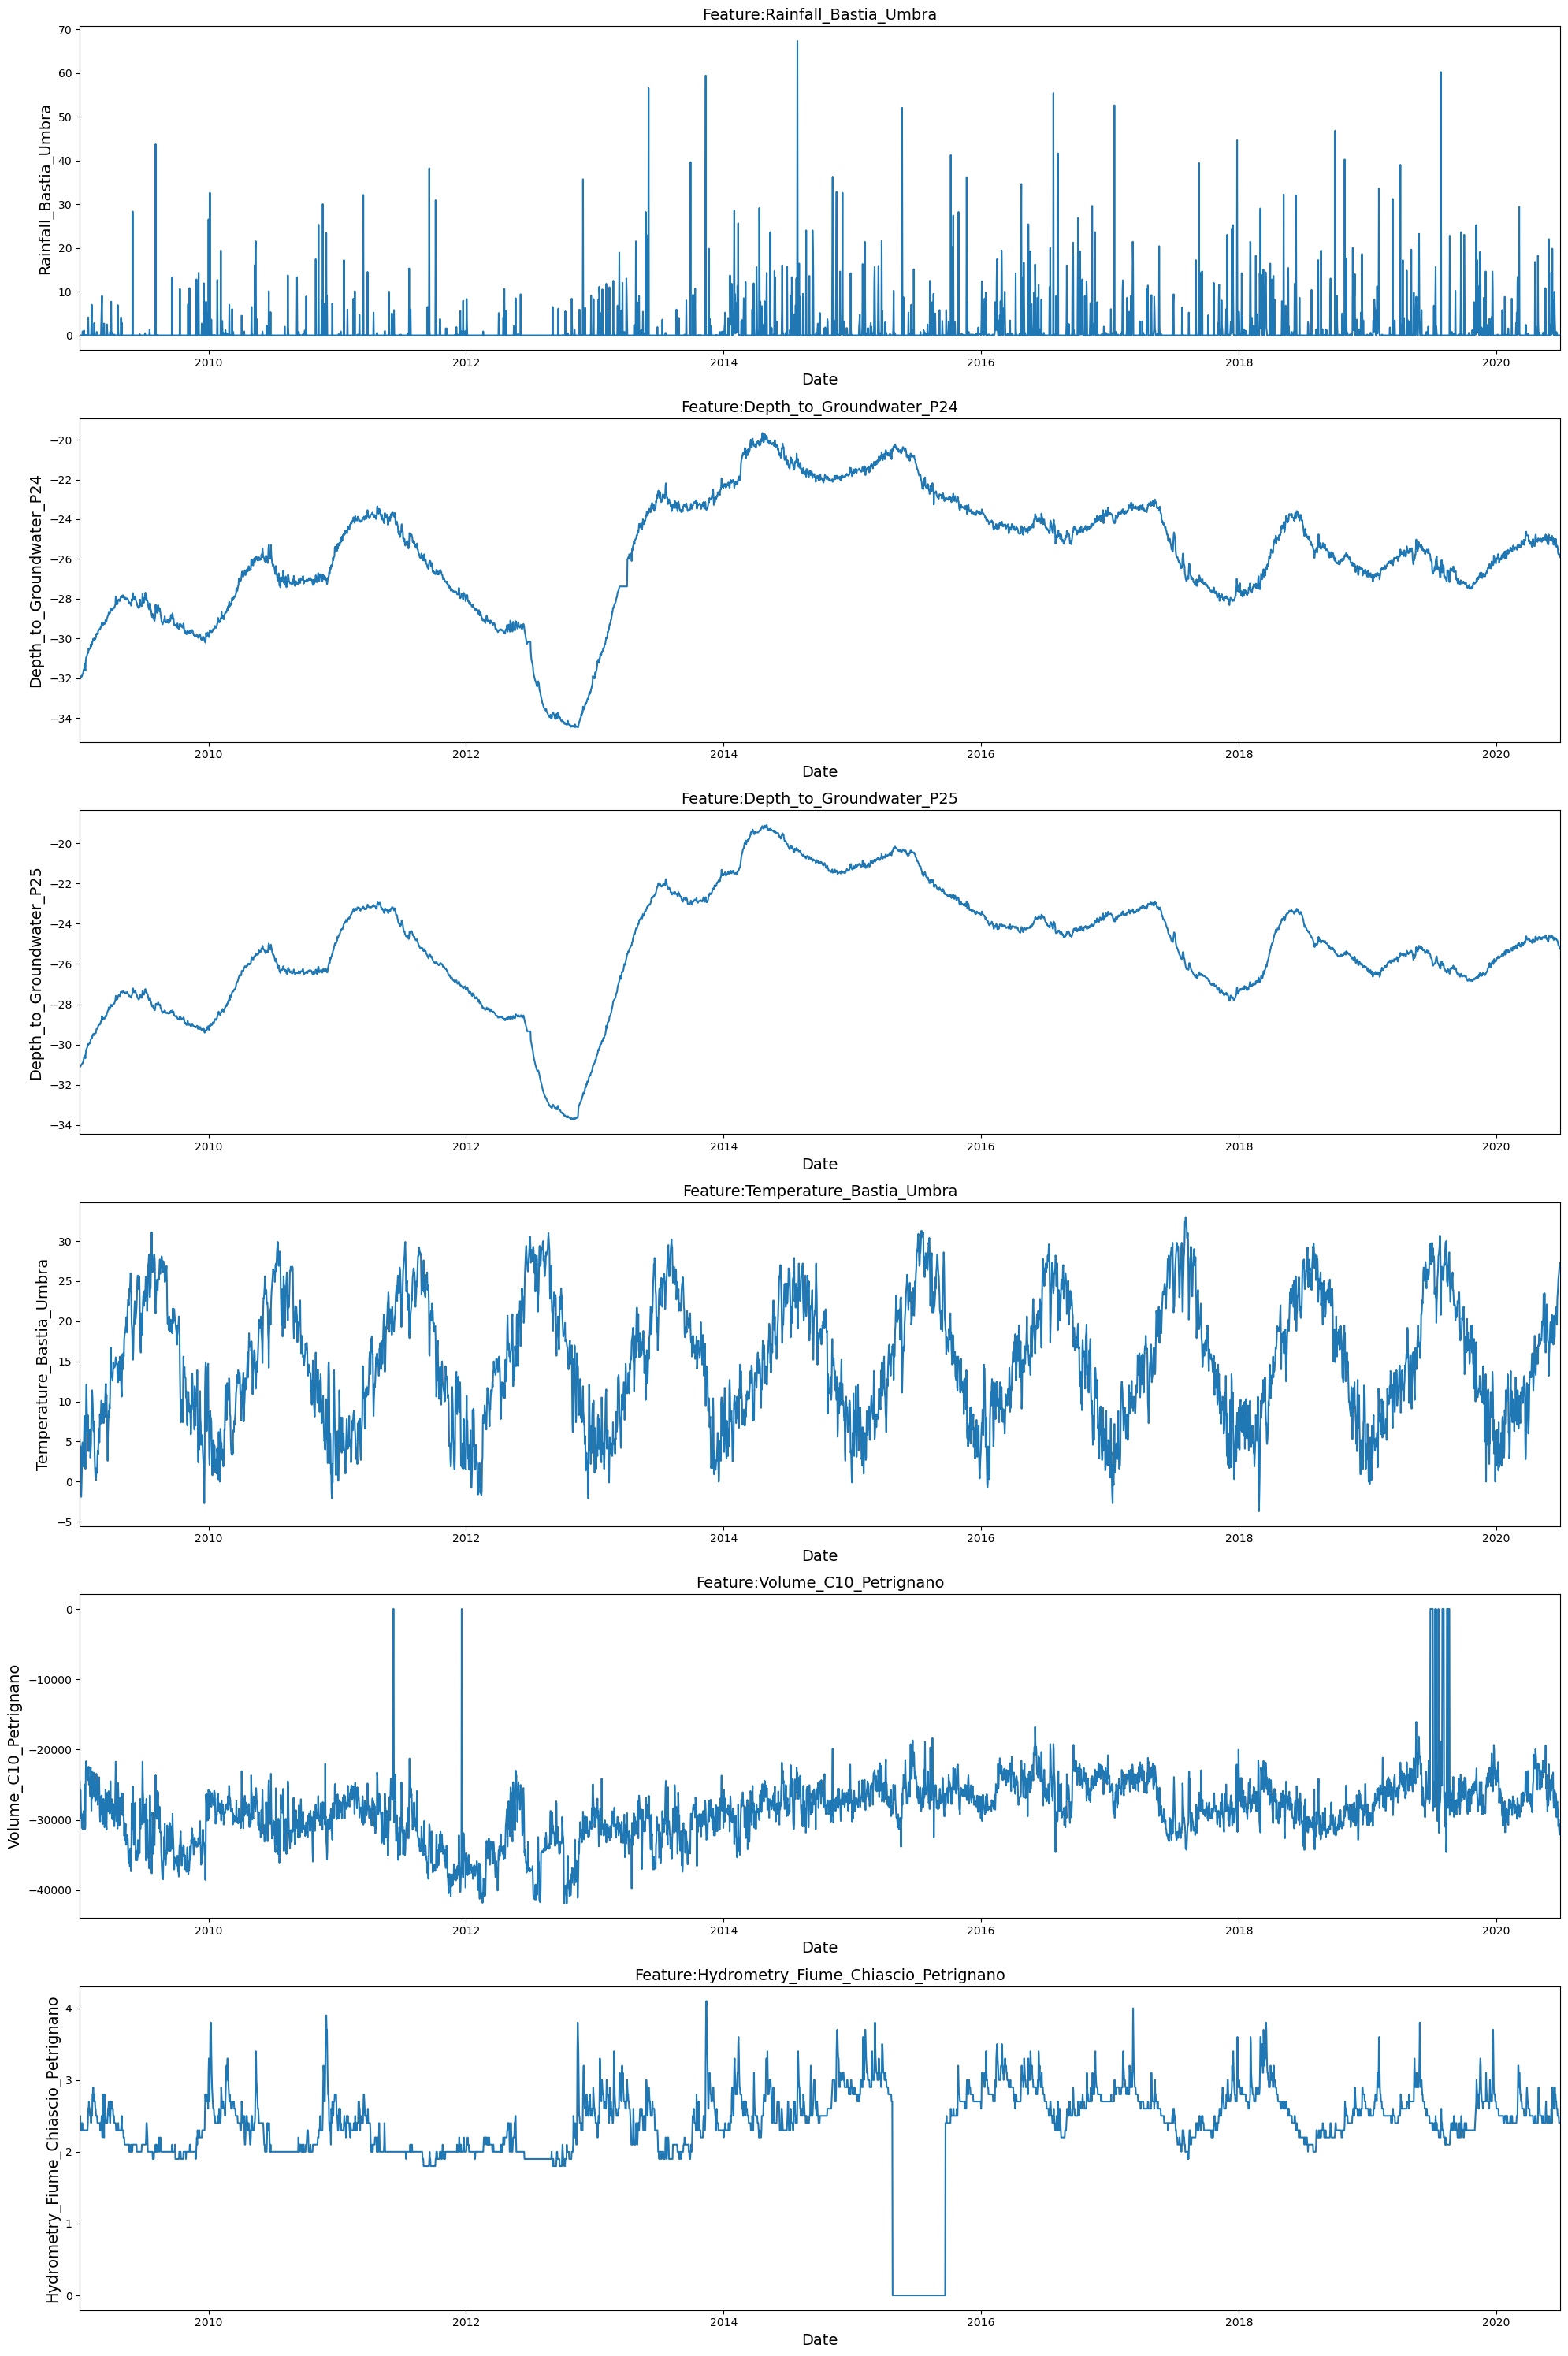

In [23]:
#出去日期有六列数据
f,ax = plt.subplots(nrows=6,ncols=1,figsize=(20,30))

#以列取修改后的数据，删去日期列作为x，其他数据作为y,并且对其中缺失的数据用前一个数据进行填充
for i,column in enumerate(df1.drop('Date',axis=1).columns):
    sns.lineplot(x=df1['Date'],y=df1[column].fillna(method='ffill'),ax=ax[i])
    ax[i].set_title('Feature:{}'.format(column),fontsize=14)
    ax[i].set_ylabel(ylabel=column,fontsize=14)
    ax[i].set_xlabel(xlabel='Date',fontsize=14)

    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])        

plt.tight_layout()
    
    

    

In [24]:
#统计缺失值的数量
df1.isnull().sum()

Date                                     0
Rainfall_Bastia_Umbra                    0
Depth_to_Groundwater_P24                39
Depth_to_Groundwater_P25                27
Temperature_Bastia_Umbra                 0
Volume_C10_Petrignano                    1
Hydrometry_Fiume_Chiascio_Petrignano     0
dtype: int64

(14245.0, 18443.0)

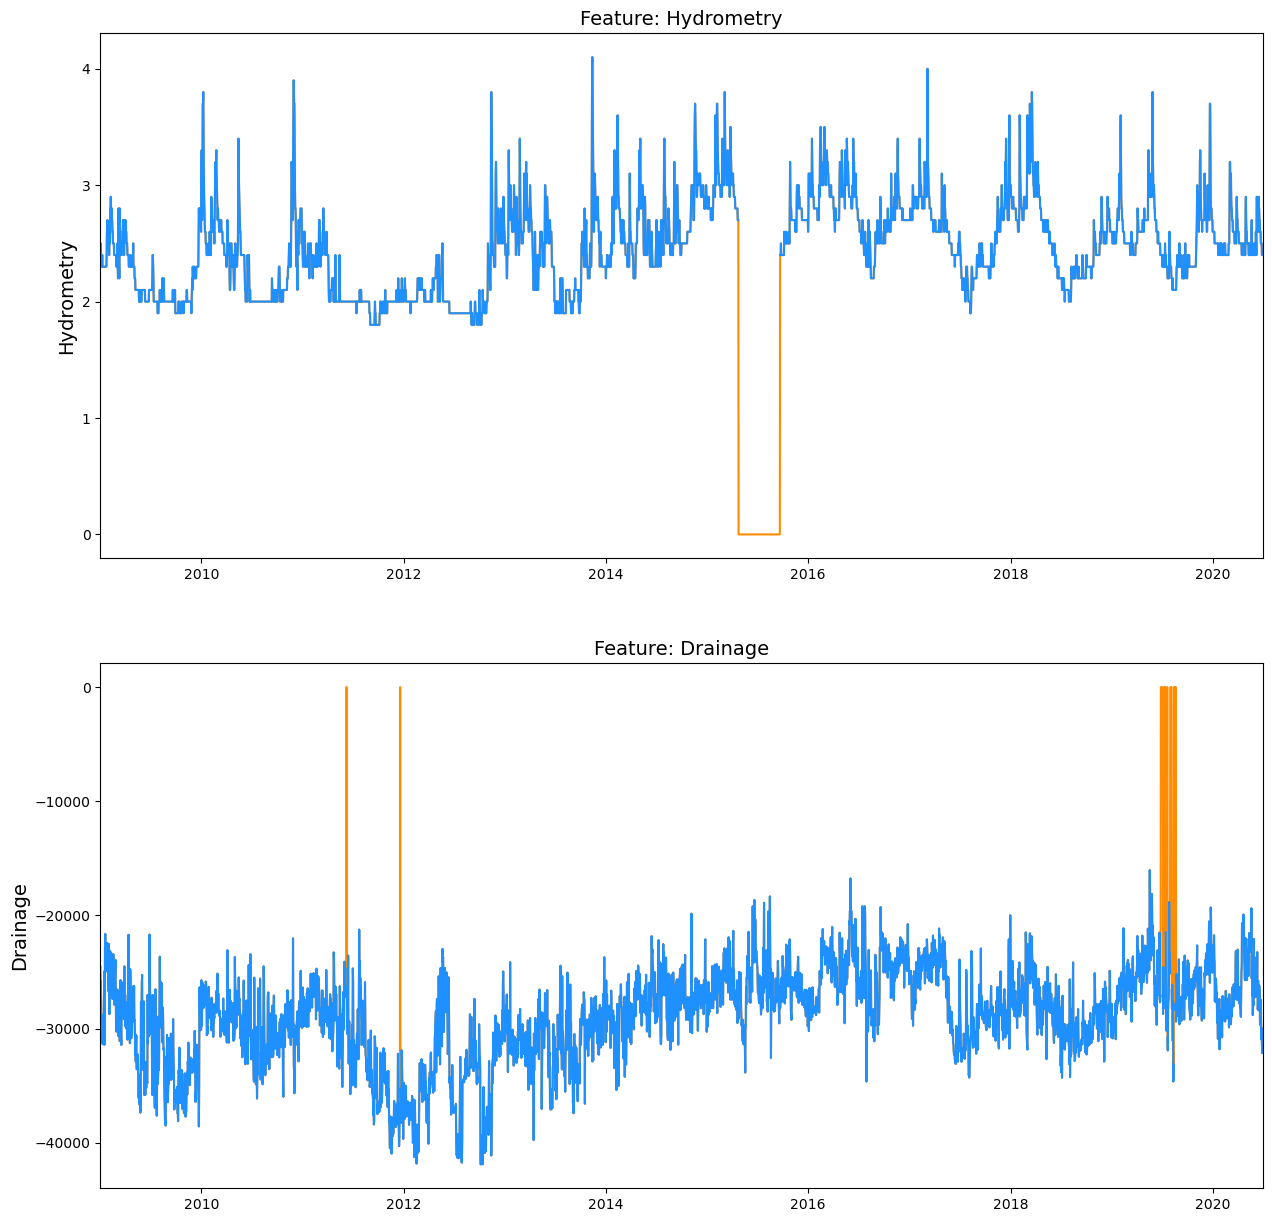

In [25]:
#发现volume有一个缺失值，实际上volume和hydrometry有许多0值都是需要处理的
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

old_hydrometry = df1['Hydrometry_Fiume_Chiascio_Petrignano'].copy()
df1['Hydrometry_Fiume_Chiascio_Petrignano'] = df1['Hydrometry_Fiume_Chiascio_Petrignano'].replace(0, np.nan)

ax[0].plot(df1['Date'], old_hydrometry,color='darkorange', label='original')
ax[0].plot(df1['Date'], df1['Hydrometry_Fiume_Chiascio_Petrignano'].fillna(np.inf),color='dodgerblue', label='modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

old_drainage = df1['Volume_C10_Petrignano'].copy()
df1['Volume_C10_Petrignano'] = df1['Volume_C10_Petrignano'].replace(0, np.nan)

ax[1].plot(df1['Date'], old_drainage,color='darkorange', label='original')
ax[1].plot(df1['Date'], df1['Volume_C10_Petrignano'].fillna(np.inf),color='dodgerblue', label='modified')
ax[1].set_title('Feature: Drainage', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

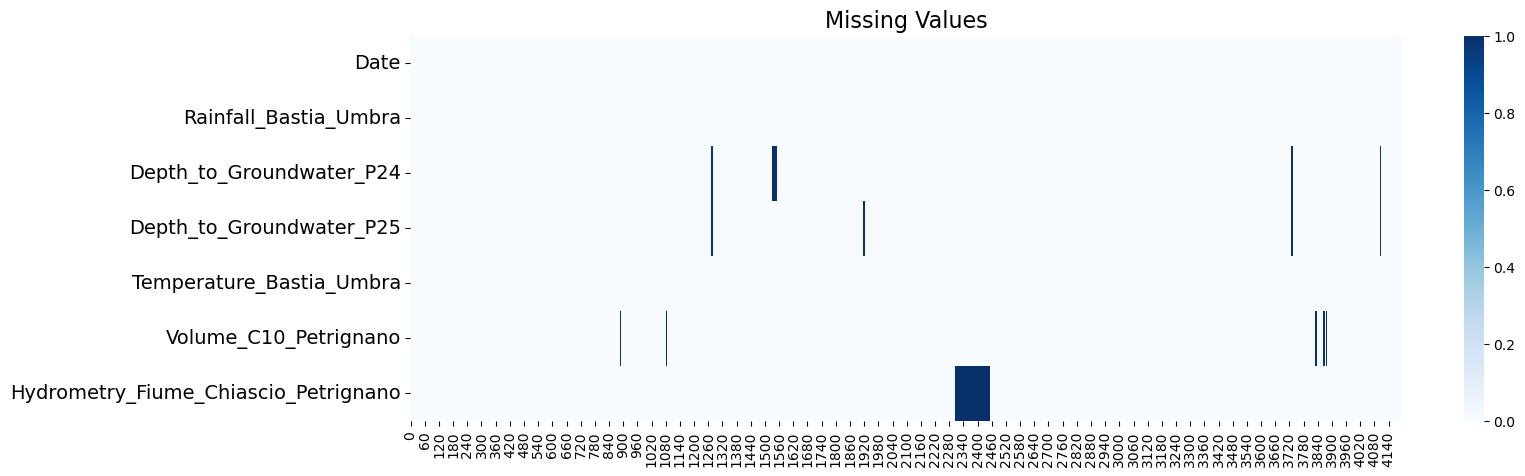

In [26]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(df1.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

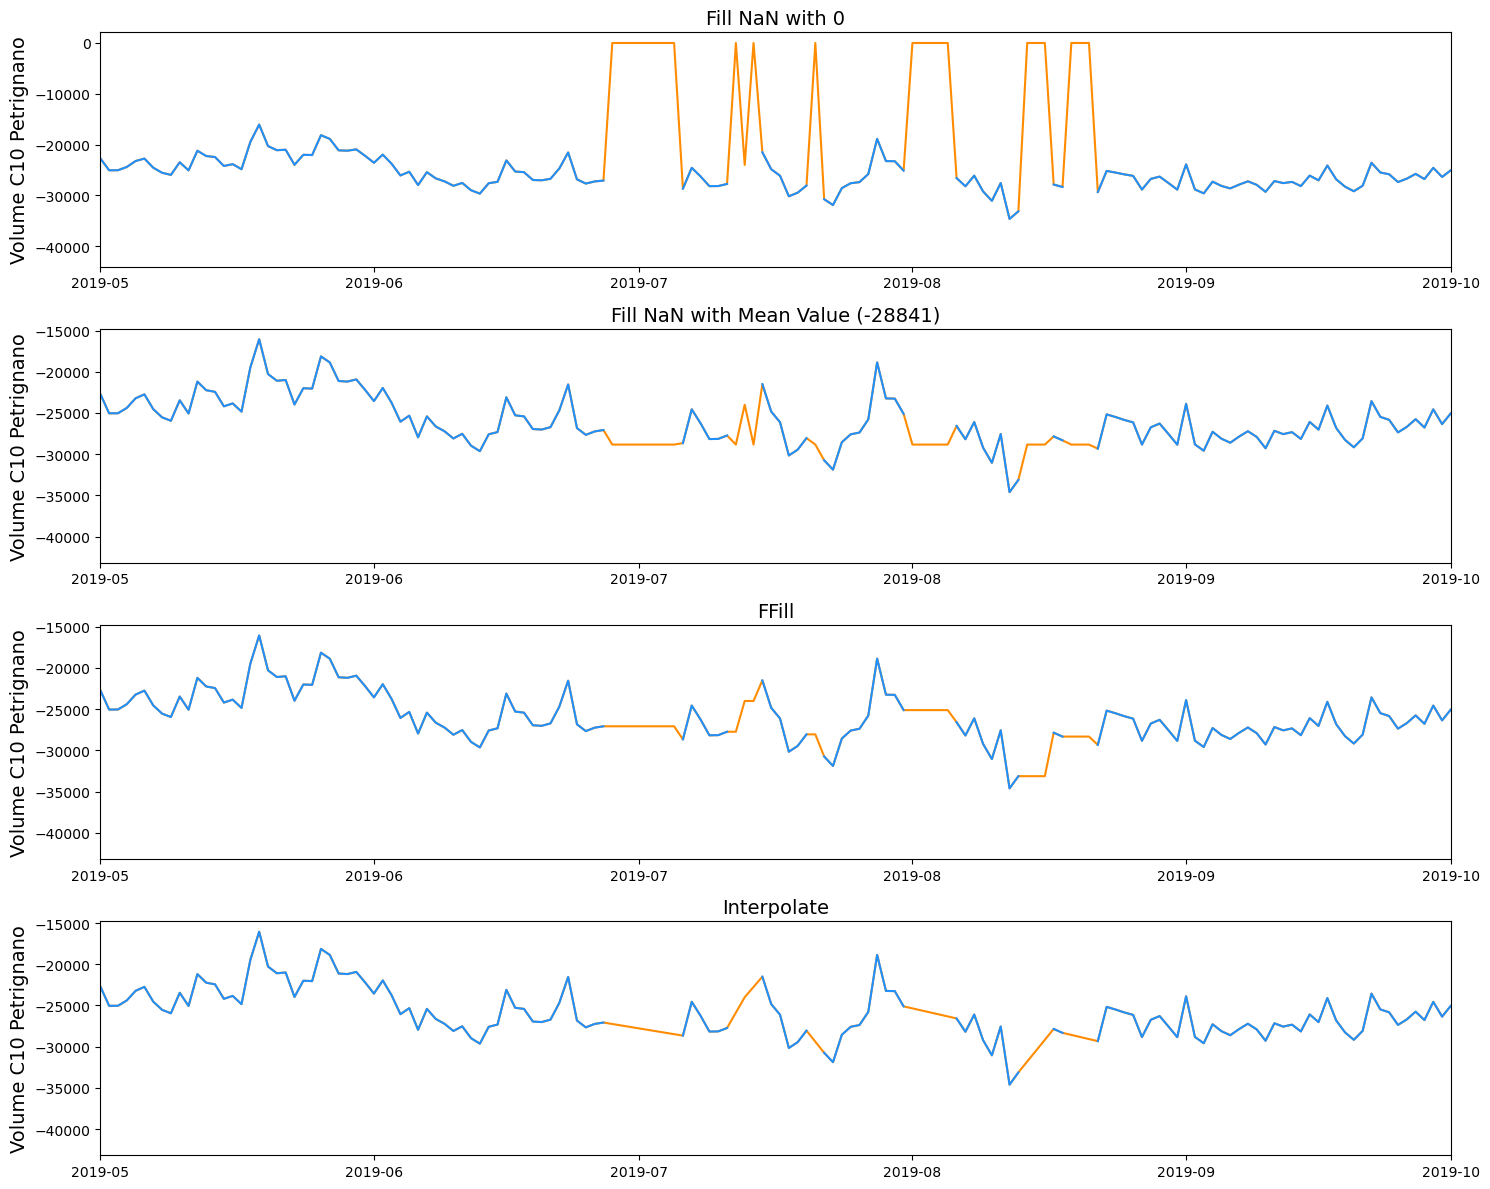

In [27]:
#使用四种不同的方式处理缺失值
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))
#插入0
ax[0].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(0),color='darkorange', label = 'modified')
ax[0].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(np.inf),color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)
#插入均值
mean_drainage = df1['Volume_C10_Petrignano'].mean()
ax[1].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(mean_drainage),color='darkorange', label = 'modified')
ax[1].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(np.inf),color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)
#向前填充
ax[2].plot(df1['Date'],df1['Volume_C10_Petrignano'].ffill(),color='darkorange', label = 'modified')
ax[2].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(np.inf),color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)
#线性插值
ax[3].plot(df1['Date'],df1['Volume_C10_Petrignano'].interpolate(),color='darkorange', label = 'modified')
ax[3].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(np.inf),color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
    
plt.tight_layout()
plt.show()

In [28]:
df1['Volume_C10_Petrignano'] = df1['Volume_C10_Petrignano'].interpolate()
df1['Hydrometry_Fiume_Chiascio_Petrignano'] = df1['Hydrometry_Fiume_Chiascio_Petrignano'].interpolate()
df1['Depth_to_Groundwater_P24'] = df1['Depth_to_Groundwater_P24'].interpolate()
df1['Depth_to_Groundwater_P25'] = df1['Depth_to_Groundwater_P25'].interpolate()

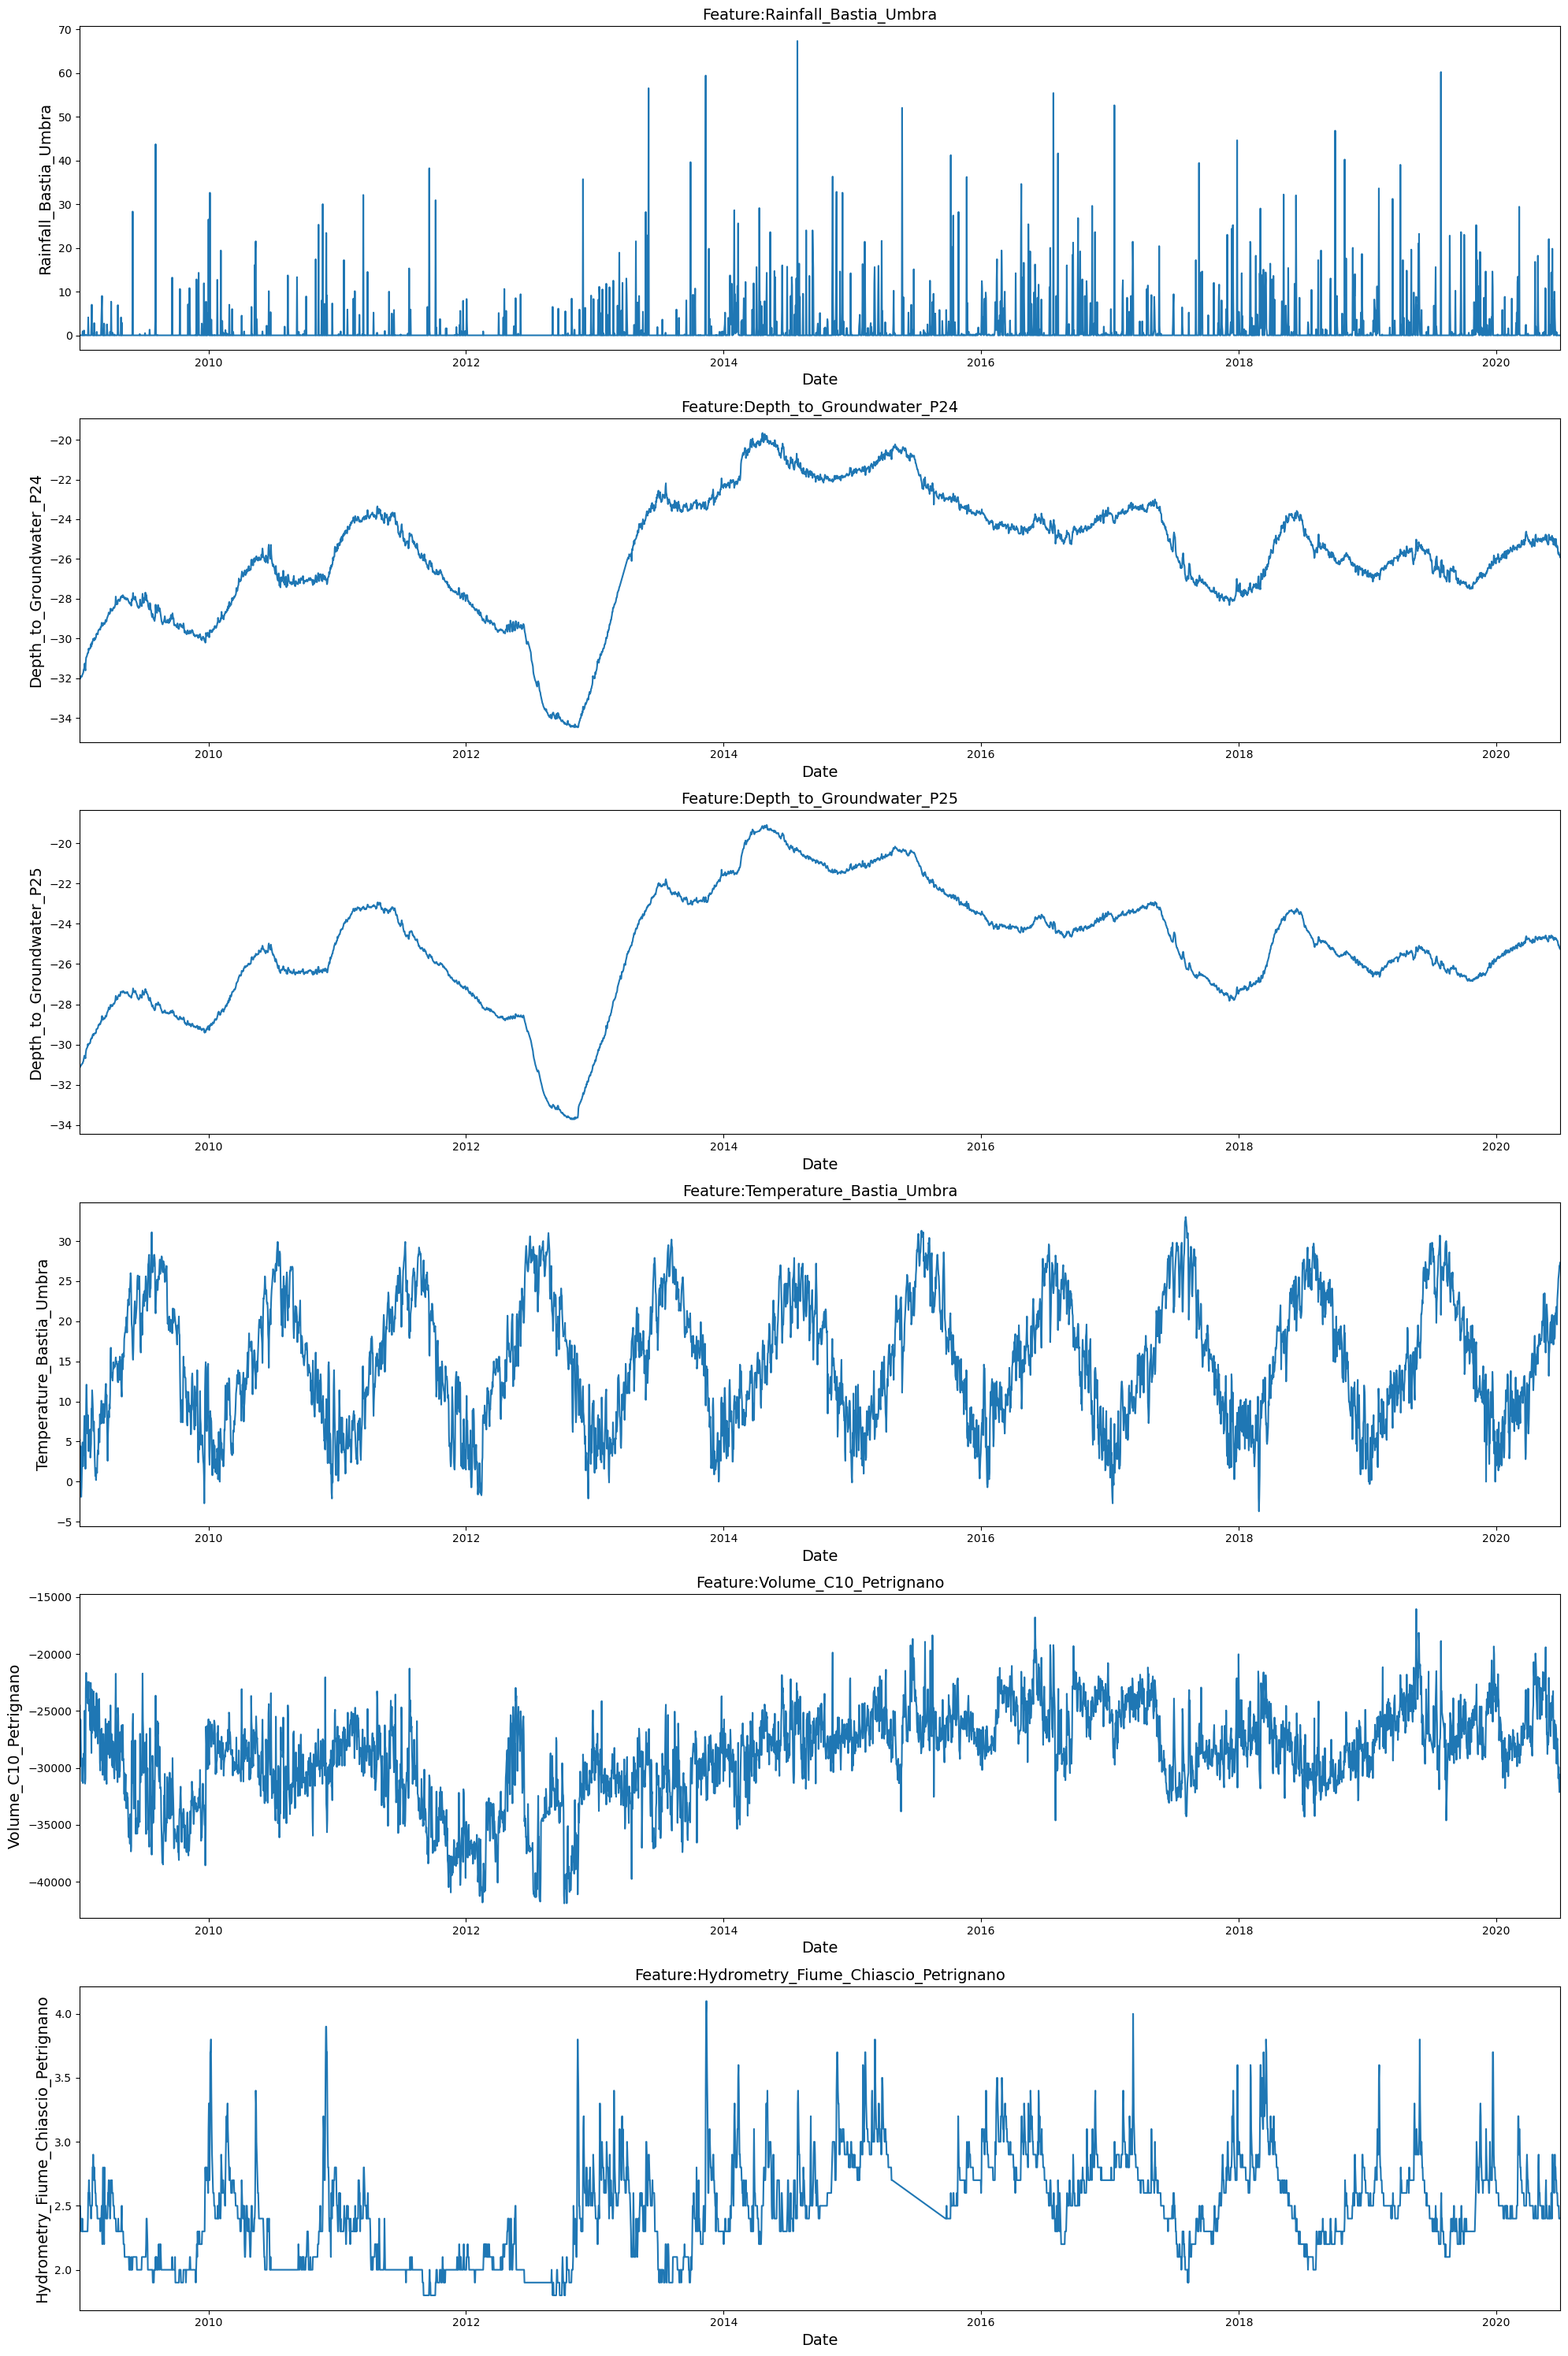

In [29]:
f,ax = plt.subplots(nrows=6,ncols=1,figsize=(20,30))

#以列取修改后的数据，删去日期列作为x，其他数据作为y
for i,column in enumerate(df1.drop('Date',axis=1).columns):
    sns.lineplot(x=df1['Date'],y=df1[column],ax=ax[i])
    ax[i].set_title('Feature:{}'.format(column),fontsize=14)
    ax[i].set_ylabel(ylabel=column,fontsize=14)
    ax[i].set_xlabel(xlabel='Date',fontsize=14)

    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])        

plt.tight_layout()

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

rolling_window = 42

target_columns = ['Depth_to_Groundwater_P24','Depth_to_Groundwater_P25']
feature_columns = ['Rainfall_Bastia_Umbra','Temperature_Bastia_Umbra','Volume_C10_Petrignano','Hydrometry_Fiume_Chiascio_Petrignano']
X = df1[feature_columns].values
y = df1[target_columns].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [57]:
X_sequences , y_sequences = [],[]
for i in range(len(X)-rolling_window):
    X_sequences.append(X[i:i+rolling_window])
    y_sequences.append(y[i+rolling_window])
X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)
X_train,X_test,y_train,y_test = train_test_split(X_sequences,y_sequences,test_size=0.2,random_state=1)
print(X_train.shape)

(3325, 42, 4)


In [58]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(2))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test))

model.summary()

Epoch 1/50
52/52 [==============================] - 8s 90ms/step - loss: 0.5914 - val_loss: 0.4857
Epoch 2/50
52/52 [==============================] - 4s 82ms/step - loss: 0.4264 - val_loss: 0.4227
Epoch 3/50
52/52 [==============================] - 4s 75ms/step - loss: 0.3722 - val_loss: 0.3351
Epoch 4/50
52/52 [==============================] - 4s 74ms/step - loss: 0.3372 - val_loss: 0.3289
Epoch 5/50
52/52 [==============================] - 4s 85ms/step - loss: 0.3041 - val_loss: 0.2649
Epoch 6/50
52/52 [==============================] - 5s 93ms/step - loss: 0.2259 - val_loss: 0.2370
Epoch 7/50
52/52 [==============================] - 4s 80ms/step - loss: 0.1863 - val_loss: 0.1460
Epoch 8/50
52/52 [==============================] - 4s 73ms/step - loss: 0.1551 - val_loss: 0.1382
Epoch 9/50
52/52 [==============================] - 4s 71ms/step - loss: 0.1125 - val_loss: 0.1013
Epoch 10/50
52/52 [==============================] - 4s 70ms/step - loss: 0.0898 - val_loss: 0.0855
Epoch 11/

In [59]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

26/26 [==============================] - 1s 14ms/step - loss: 0.0026
Test Loss: 0.0025517435278743505


In [60]:
lstm_predictions = model.predict(X_test)

26/26 [==============================] - 1s 14ms/step


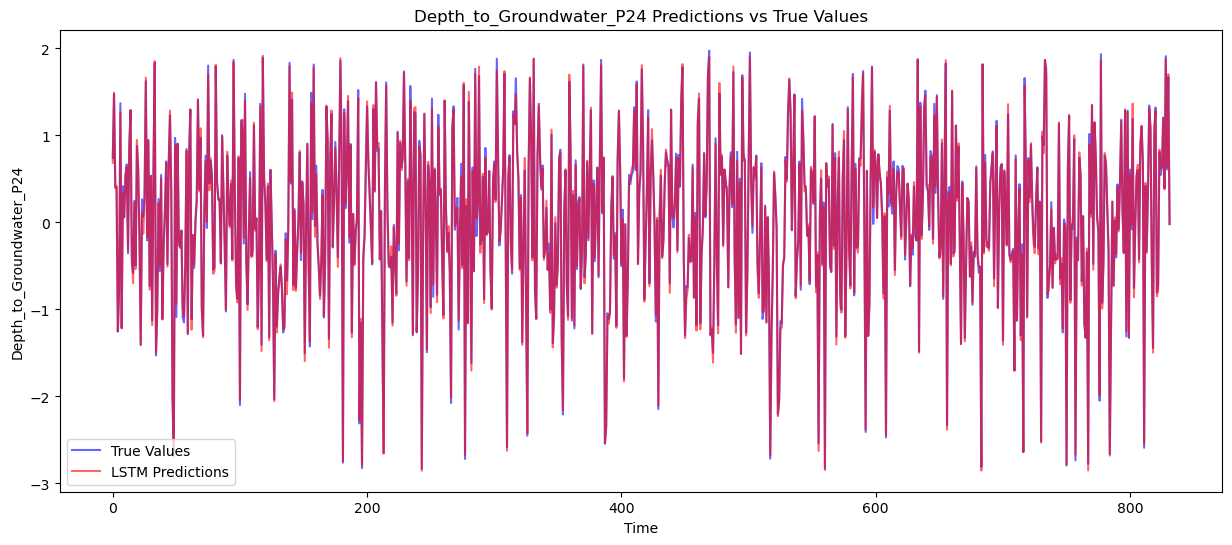

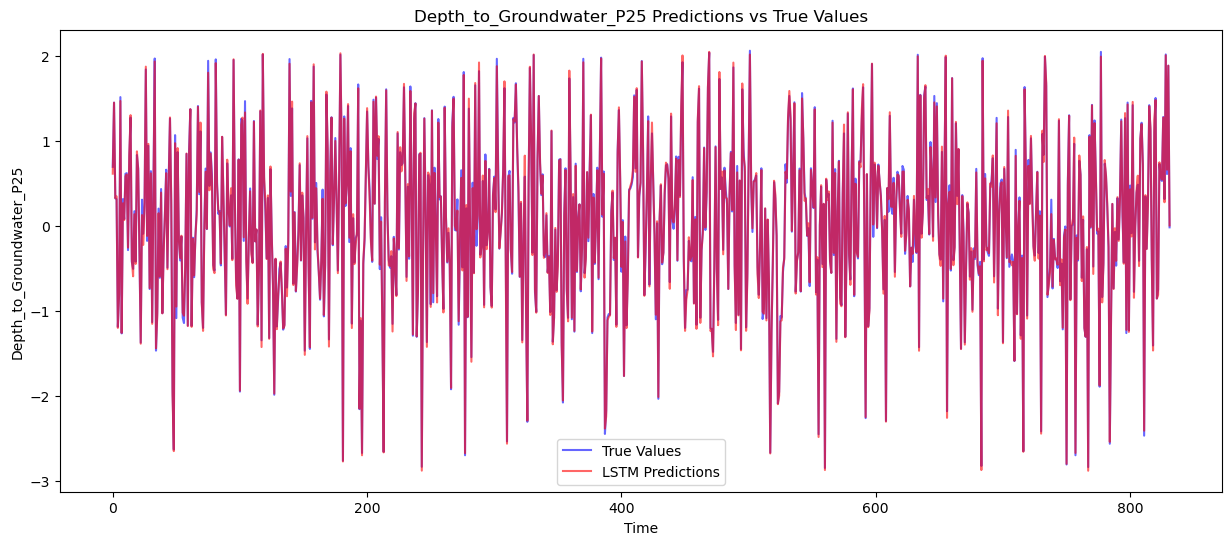

In [63]:
import matplotlib.pyplot as plt

# 为每一列数据生成图表
for i, target_column in enumerate(target_columns):
    # 获取真实值、LSTM模型预测值和线性回归模型预测值
    true_values = y_test[:, i]
    lstm_predictions_column = lstm_predictions[:, i]  # 获取第 i 列的LSTM预测值

    # 创建时间序列
    time_series = range(len(true_values))

    # 创建一个新的图表
    plt.figure(figsize=(15, 6))

    # 绘制真实值
    plt.plot(time_series, true_values, label='True Values', color='blue', alpha=0.6)

    # 绘制LSTM模型预测值
    plt.plot(time_series, lstm_predictions_column, label='LSTM Predictions', color='red', alpha=0.6)


    # 设置标题和标签
    plt.title(f'{target_column} Predictions vs True Values')
    plt.xlabel('Time')
    plt.ylabel(target_column)
    # 添加图例
    plt.legend()

    # 显示图表
    plt.show()


In [30]:
#data = data[data.Depth_to_Groundwater_Podere_Casetta.notna()].reset_index(drop=True)  #删去09年前的数据
output = ['Depth_to_Groundwater_P24']
df1['Date'] = pd.to_datetime(df1.Date, format='%d/%m/%Y')
df1.set_index('Date', inplace=True)
data_output1 = df1.loc['2009-01-01':'2020-06-30', 'Depth_to_Groundwater_P24']
data_output2 = df1.loc['2009-01-01':'2020-06-30', 'Depth_to_Groundwater_P25']

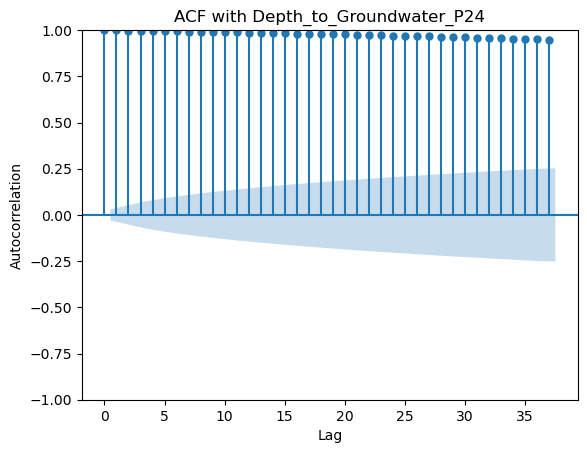

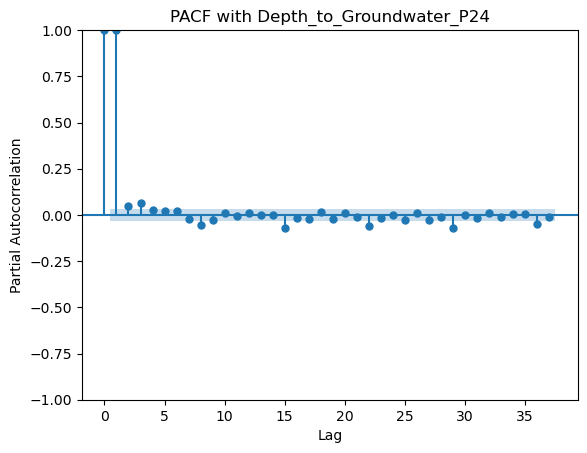

In [31]:
#ARIMA模型---Depth_to_Groundwater_P24
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
train_data_1 = data_output1.loc['2009-01-01':'2020-02-01']
test_data_1 = data_output1.loc['2019-06-01':'2020-06-30']
plot_acf(data_output1, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF with Depth_to_Groundwater_P24')

plt.show()
plot_pacf(data_output1, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF with Depth_to_Groundwater_P24')
plt.show()

In [39]:
from statsmodels.tsa.arima.model import ARIMA
min_mean_squared_error = 1
best_p = 1
best_d = 1
best_q = 1
for p in range(1,6):
    for d in range(1,4):
        for q in range(1,21):
            model_1 = ARIMA(train_data_1, order=(p, d, q))
            model_fit = model_1.fit()
            start_date = test_data_1.index[0]
            end_date = test_data_1.index[-1]
            predictions = model_fit.predict(start=start_date, end=end_date)
            if mean_squared_error(test_data_1, predictions) < min_mean_squared_error:
                min_mean_squared_error = mean_squared_error(test_data_1, predictions)
                best_p = p
                best_d = d
                best_q = q
            print(min_mean_squared_error,best_p,best_d,best_q,p,d,q)
print(min_mean_squared_error,best_p,best_q,best_d)

0.11572584166645188 1 1 1 1 1 1
0.11572584166645188 1 1 1 1 1 2
0.04046262753358885 1 1 3 1 1 3
0.04046262753358885 1 1 3 1 1 4
0.04046262753358885 1 1 3 1 1 5
0.04046262753358885 1 1 3 1 1 6
0.04046262753358885 1 1 3 1 1 7
0.04046262753358885 1 1 3 1 1 8
0.04046262753358885 1 1 3 1 1 9
0.04046262753358885 1 1 3 1 1 10
0.03673132850078415 1 1 11 1 1 11
0.03673132850078415 1 1 11 1 1 12
0.03673132850078415 1 1 11 1 1 13
0.03673132850078415 1 1 11 1 1 14
0.03673132850078415 1 1 11 1 1 15
0.03477261677689063 1 1 16 1 1 16
0.03477261677689063 1 1 16 1 1 17
0.03477261677689063 1 1 16 1 1 18
0.03477261677689063 1 1 16 1 1 19
0.03477261677689063 1 1 16 1 1 20
0.03477261677689063 1 1 16 1 2 1
0.03477261677689063 1 1 16 1 2 2
0.03477261677689063 1 1 16 1 2 3
0.03477261677689063 1 1 16 1 2 4
0.03477261677689063 1 1 16 1 2 5
0.03477261677689063 1 1 16 1 2 6
0.03477261677689063 1 1 16 1 2 7
0.03477261677689063 1 1 16 1 2 8
0.03477261677689063 1 1 16 1 2 9
0.03477261677689063 1 1 16 1 2 10
0.034772

0.9462151639282181
0.034564129995521865


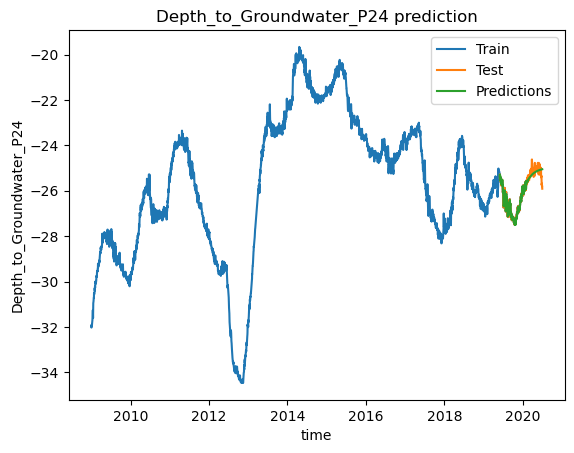

In [40]:
from statsmodels.tsa.arima.model import ARIMA
model_1 = ARIMA(train_data_1, order=(best_p, best_d, best_q))
model_fit = model_1.fit()
start_date = test_data_1.index[0]
end_date = test_data_1.index[-1]
predictions = model_fit.predict(start=start_date, end=end_date)
print(r2_score(test_data_1, predictions))
print(mean_squared_error(test_data_1, predictions))
plt.plot(train_data_1, label='Train')
plt.plot(test_data_1, label='Test')
plt.plot(predictions, label='Predictions')
plt.xlabel('time')
plt.ylabel('Depth_to_Groundwater_P24')
plt.title('Depth_to_Groundwater_P24 prediction')
plt.legend()
plt.show()

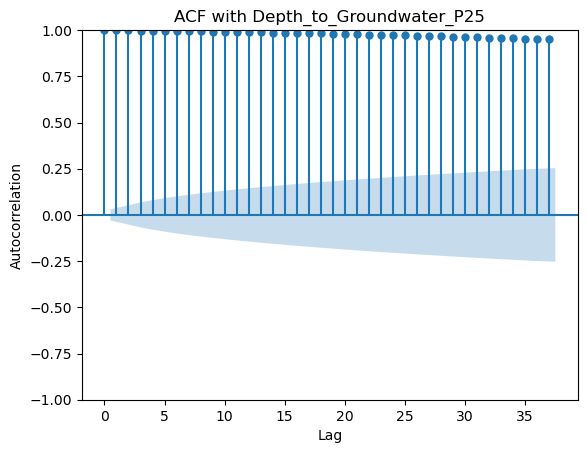

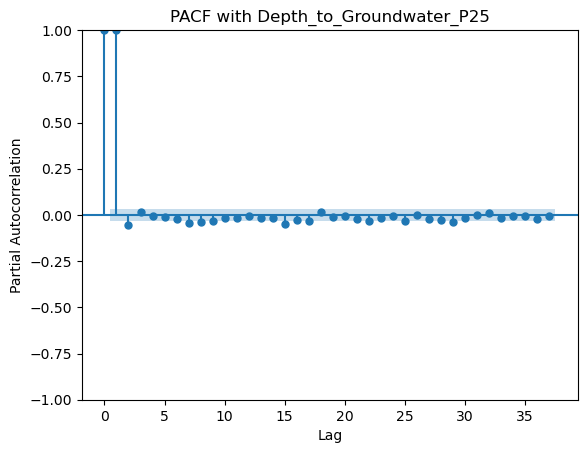

In [46]:
#ARIMA模型---Depth_to_Groundwater_P25
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
train_data_2 = data_output2.loc['2009-01-01':'2020-02-01']
test_data_2 = data_output2.loc['2019-06-01':'2020-06-30']
plot_acf(data_output2, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF with Depth_to_Groundwater_P25')

plt.show()
plot_pacf(data_output2, alpha=0.05)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF with Depth_to_Groundwater_P25')
plt.show()

In [48]:
from statsmodels.tsa.arima.model import ARIMA
min_mean_squared_error = 1
best_p = 1
best_d = 1
best_q = 1
for p in range(1,6):
    for d in range(1,4):
        for q in range(1,21):
            model_2 = ARIMA(train_data_2, order=(p, d, q))
            model_fit_2 = model_2.fit()
            start_date = test_data_2.index[0]
            end_date = test_data_2.index[-1]
            predictions = model_fit_2.predict(start=start_date, end=end_date)
            if mean_squared_error(test_data_2, predictions) < min_mean_squared_error:
                min_mean_squared_error = mean_squared_error(test_data_2, predictions)
                best_p = p
                best_d = d
                best_q = q
            print(min_mean_squared_error,best_p,best_d,best_q,p,d,q)
print(min_mean_squared_error,best_p,best_q,best_d)

0.09607309708604529 1 1 1 1 1 1
0.09607309708604529 1 1 1 1 1 2
0.09607309708604529 1 1 1 1 1 3
0.019396428863527652 1 1 4 1 1 4
0.019396428863527652 1 1 4 1 1 5
0.015275703637898824 1 1 6 1 1 6
0.010232535189752381 1 1 7 1 1 7
0.010232535189752381 1 1 7 1 1 8
0.010232535189752381 1 1 7 1 1 9
0.00972134112276188 1 1 10 1 1 10
0.00972134112276188 1 1 10 1 1 11
0.00972134112276188 1 1 10 1 1 12
0.00972134112276188 1 1 10 1 1 13
0.00972134112276188 1 1 10 1 1 14
0.00972134112276188 1 1 10 1 1 15
0.00972134112276188 1 1 10 1 1 16
0.00972134112276188 1 1 10 1 1 17
0.00972134112276188 1 1 10 1 1 18
0.00972134112276188 1 1 10 1 1 19
0.00972134112276188 1 1 10 1 1 20
0.00972134112276188 1 1 10 1 2 1
0.00972134112276188 1 1 10 1 2 2
0.00972134112276188 1 1 10 1 2 3
0.00972134112276188 1 1 10 1 2 4
0.00972134112276188 1 1 10 1 2 5
0.00972134112276188 1 1 10 1 2 6
0.00972134112276188 1 1 10 1 2 7
0.00972134112276188 1 1 10 1 2 8
0.00972134112276188 1 1 10 1 2 9
0.00972134112276188 1 1 10 1 2 10
0

0.9518961567190085
0.02436510168518233


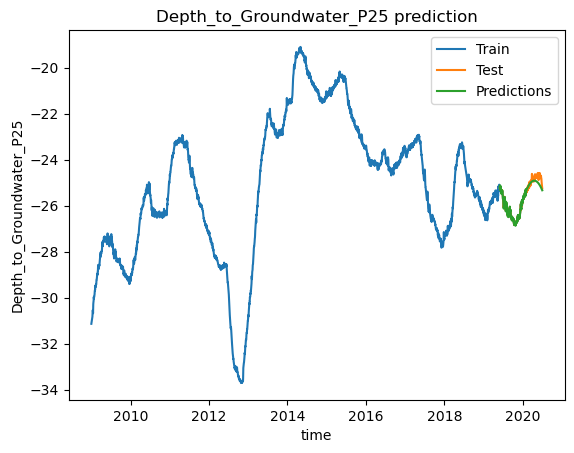

In [49]:
from statsmodels.tsa.arima.model import ARIMA
model_2 = ARIMA(train_data_2, order=(4, 3, 4))
model_fit_2 = model_2.fit()
start_date = test_data_2.index[0]
end_date = test_data_2.index[-1]
predictions = model_fit_2.predict(start=start_date, end=end_date)
print(r2_score(test_data_2, predictions))
print(mean_squared_error(test_data_2, predictions))
plt.plot(train_data_2, label='Train')
plt.plot(test_data_2, label='Test')
plt.plot(predictions, label='Predictions')
plt.xlabel('time')
plt.ylabel('Depth_to_Groundwater_P25')
plt.title('Depth_to_Groundwater_P25 prediction')
plt.legend()
plt.show()